In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df_train = pd.read_csv("../input/train_aozora.csv", sep='\t')
df_train['category_id'] = df_train.type.factorize()[0]
df_train.sample(5, random_state=0)

,type,text,category_id
405,souseki,妻 の 母 は 時々 ｜ 気 拙 きまず い 事 を 妻 に いう よう でし た 。 ...,0
1190,touson,と 言 つて 盃 を さす 。 丑松 は 其 を 受取 つて 、 一息 に ぐいと 飲 乾 ...,1
1132,touson,しかし 、 うまく 行 つて 呉れる と 好い です が なあ ——,1
731,souseki,そう かい 、 それ じゃ 早く お 出し 。 そんな 事 は 他 ひと が 気 を ...,0
1754,touson,あゝ 、 丑松 が 駈 付け た 時 は 、 もう 間 に 合 は なかつ た 。 丑松 ば...,1


In [21]:
train_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_train, df_train["category_id"], num_epochs=None, shuffle=True)

In [23]:
df_test = pd.read_csv("../input/test_aozora.csv", sep='\t')
df_test['category_id'] = df_test.type.factorize()[0]
df_test.sample(5, random_state=0)

,type,text,category_id
153,souseki,それで なぜ 活動 が でき ない ん でしょ う,0
393,touson,わり や （ 汝 なん ぢ は ） 飛ん で も ねえ こと を 為 て 呉れ た な...,1
54,souseki,ええ,0
188,souseki,私 は 緊張 し て 唾液 つば き を 呑 の み 込ん だ 。,0
196,souseki,私 は 始め 心 の なか で 、 何 も 知ら ない 母 を 憐 あわ れん だ 。 ...,0


In [29]:
predict_test_input_fn = tf.estimator.inputs.pandas_input_fn(
        df_test, df_test["category_id"], shuffle=False)

In [25]:
embedded_text_feature_column = hub.text_embedding_column(
        key="text", 
        module_spec="https://tfhub.dev/google/nnlm-ja-dim128/1")

In [26]:
estimator = tf.estimator.DNNClassifier(
        hidden_units=[512, 128],
        feature_columns=[embedded_text_feature_column],
        n_classes=2,
        optimizer=tf.train.AdamOptimizer(learning_rate=0.003))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmp_djvrufl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12061ceb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [27]:
estimator.train(input_fn=train_input_fn, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmp_djvrufl/model.ckpt.
INFO:tensorflow:loss = 92.91701, step = 1
INFO:tensorflow:global_step/sec: 151.791
INFO:tensorflow:loss = 13.47764, step = 101 (0.659 sec)
INFO:tensorflow:global_step/sec: 171.874
INFO:tensorflow:loss = 1.4115262, step = 201 (0.582 sec)
INFO:tensorflow:global_step/sec: 172.133
INFO:tensorflow:loss = 0.27206126, step = 301 (0.581 sec)
INFO:tensorflow:global_step/sec: 168.46
INFO:tensorflow:loss = 0.03694132, step = 401 (0.594 sec)
INFO:tensorflow:global_step/sec:

In [30]:
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
test_eval_result = estimator.evaluate(input_fn=predict_test_input_fn)
print("Test set accuracy: {accuracy}".format(**test_eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-21T00:12:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmp_djvrufl/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-21-00:12:26
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9701835, accuracy_baseline = 0.5, auc = 0.98715395, auc_precision_recall = 0.98689896, average_loss = 0.141752, global_step = 1000, label/mean = 0.5, loss = 15.450968, precision = 0.9638009, prediction/mean = 0.512564, recall = 0.9770642
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/k9/0d1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/k9/0d1smgqj6f9_hkzf80qfbw80941m76/T/tmp_djvrufl/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


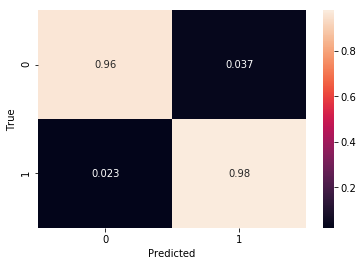

In [32]:
def get_predictions(estimator, input_fn):
    return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    0, 1
]

# Create a confusion matrix on training data.
with tf.Graph().as_default():
    cm = tf.confusion_matrix(df_test["category_id"], 
                           get_predictions(estimator, predict_test_input_fn))
    with tf.Session() as session:
        cm_out = session.run(cm)

# Normalize the confusion matrix so that each row sums to 1.
cm_out = cm_out.astype(float) / cm_out.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_out, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");